In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


##### Problem statment
A retail company aims to optimize its marketing and sales strategies by leveraging data-driven insights. It seeks to identify the key factors that influence customer purchase decisions, such as age, income, gender, education level, marital status, and product interest. By developing a logistic regression model, the company intends to quantitatively establish the relationship between these variables and purchase behavior. Additionally, it aims to evaluate the model’s accuracy to ensure reliable, data-backed decision-making.

##### Objectives:
1) To understand the demographic and behavioral factors influencing purchase decisions.
2) To examine the relationship between independent variables (IVs) and the dependent variable (DV).
3) To quantify the influence of individual predictors (IVs) on the likelihood of purchase (DV).



##### Hypotheses:

H1: Age significantly influences purchase decision.

H2: Income level has a significant effect on purchase decision.

H3: Gender plays a significant role in determining purchase behavior.

H4: Marital status is significantly associated with purchase decision.

H5: Higher product interest is positively correlated with higher likelihood of purchase.

In [12]:
#Description of the Variables

data = {
    'Variable': [
        'Purchase', 'Age', 'Income', 'Gender', 'Marital_Status',
        'Education_Level', 'Purchase_History', 'Product_Interest'
    ],
    'Description': [
        'Whether the customer made a purchase',
        'Age of the customer',
        'Annual income of the customer',
        'Gender of the customer',
        'Marital status',
        'Highest education level',
        'Number of past purchases',
        'Level of interest in product (1–10)'
    ],
    'Qualitative/Quantitative': [
        'Quantitative (Binary)', 'Quantitative', 'Quantitative',
        'Qualitative', 'Qualitative', 'Qualitative',
        'Quantitative', 'Quantitative'
    ],
    'Endogenous/Exogenous': [
        'Endogenous (DV)', 'Exogenous (IV)', 'Exogenous (IV)',
        'Exogenous (IV)', 'Exogenous (IV)', 'Exogenous (IV)',
        'Exogenous (IV)', 'Exogenous (IV)'
    ]
}

df_table = pd.DataFrame(data)
print(df_table.to_markdown(index=False))  # For CLI or Markdown output

| Variable         | Description                          | Qualitative/Quantitative   | Endogenous/Exogenous   |
|:-----------------|:-------------------------------------|:---------------------------|:-----------------------|
| Purchase         | Whether the customer made a purchase | Quantitative (Binary)      | Endogenous (DV)        |
| Age              | Age of the customer                  | Quantitative               | Exogenous (IV)         |
| Income           | Annual income of the customer        | Quantitative               | Exogenous (IV)         |
| Gender           | Gender of the customer               | Qualitative                | Exogenous (IV)         |
| Marital_Status   | Marital status                       | Qualitative                | Exogenous (IV)         |
| Education_Level  | Highest education level              | Qualitative                | Exogenous (IV)         |
| Purchase_History | Number of past purchases             | Quantitative               |

In [13]:
df=pd.DataFrame(pd.read_csv("CUSTOMER_PURCHASE.csv"))

In [14]:
df

,Age,Income,Gender,Marital_Status,Education_Level,Purchase_History,Product_Interest,Purchase
0,56,81063,Male,Single,Bachelor’s,2,7,1
1,69,138527,Male,Single,High School,11,8,1
2,46,143239,Female,Married,High School,19,9,1
3,32,147896,Male,Divorced,PhD,6,2,0
4,60,55144,Male,Single,PhD,7,1,1
...,...,...,...,...,...,...,...,...
2995,49,83972,Male,Married,High School,11,10,0
2996,65,140018,Female,Divorced,Bachelor’s,15,8,0
2997,45,109791,Female,Single,Bachelor’s,5,1,0
2998,34,61003,Female,Divorced,Master’s,19,10,1


In [15]:
df.isnull().sum()

Age                 0
Income              0
Gender              0
Marital_Status      0
Education_Level     0
Purchase_History    0
Product_Interest    0
Purchase            0
dtype: int64

In [16]:
df.head()

,Age,Income,Gender,Marital_Status,Education_Level,Purchase_History,Product_Interest,Purchase
0,56,81063,Male,Single,Bachelor’s,2,7,1
1,69,138527,Male,Single,High School,11,8,1
2,46,143239,Female,Married,High School,19,9,1
3,32,147896,Male,Divorced,PhD,6,2,0
4,60,55144,Male,Single,PhD,7,1,1


In [17]:
df.describe()

,Age,Income,Purchase_History,Product_Interest,Purchase
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,44.054000,83104.010000,10.286667,5.443000,0.519333
std,15.243355,37527.105198,6.015304,2.874051,0.499709
min,18.000000,20112.000000,0.000000,1.000000,0.000000
25%,31.000000,49735.500000,5.000000,3.000000,0.000000
50%,44.000000,82818.000000,11.000000,5.000000,1.000000
75%,57.000000,114769.250000,15.000000,8.000000,1.000000
max,70.000000,149974.000000,20.000000,10.000000,1.000000


##### interpretation
The dataset consists of 3,000 customer records with no missing values and provides insights into key factors influencing purchase decisions. The average customer age is around 44 years, ranging from 18 to 70, indicating a well-diversified age group. Income levels vary significantly, with an average annual income of ₹83,104 and a range from ₹20,112 to ₹1,49,974, suggesting that the customer base includes individuals from both lower and higher income brackets. On average, customers have made about 10 past purchases, though this ranges from none to 20, reflecting a mix of new and loyal buyers. Product interest scores, rated on a scale from 1 to 10, have a balanced distribution with a slight lean toward higher interest levels—half the customers score 5 or above, and a quarter show very strong interest (score of 8 or more). Finally, the purchase variable is evenly split, with nearly 52% of customers making a purchase, making the dataset suitable for predictive modeling. Overall, the data reflects a diverse and balanced customer base, providing a solid foundation for analyzing the factors that influence purchasing behavior.

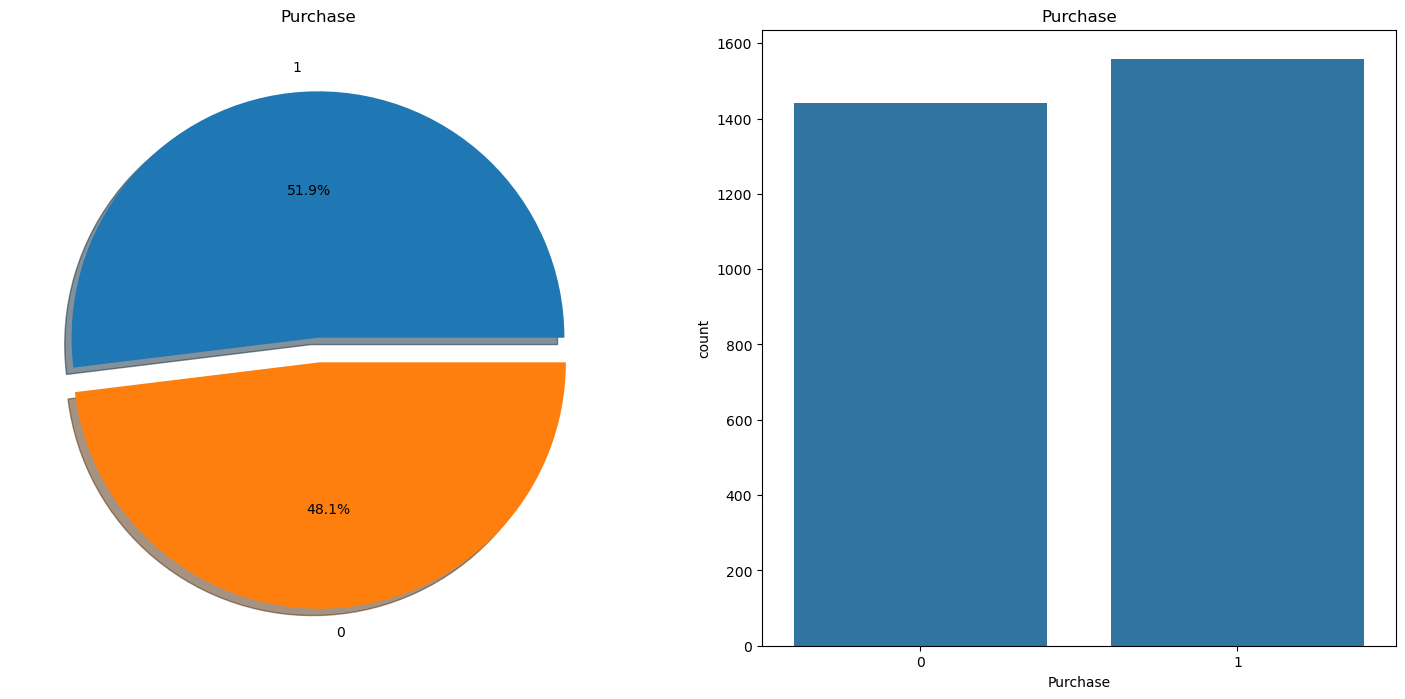

In [18]:
f,ax=plt.subplots(1,2,figsize=(18, 8))
df['Purchase'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Purchase')
ax[0].set_ylabel('')
sns.countplot(x='Purchase',data=df,ax=ax[1])
ax[1].set_title('Purchase')
plt.show()

##### Interpretation 
The pie chart visually represents the proportion of customers who made a purchase vs. those who didn’t.
Two slices:
One slice represents Purchase = 1 (Yes) — customers who completed a purchase.
One slice represents Purchase = 0 (No) — customers who didn’t purchase.
The % shown on the chart indicates what percentage of the total 3000 customers fall into each category.
The exploded slice (slightly separated) highlights the larger or more emphasized category.
 Interpretation Example (if pie shows 51.9% Yes, 48.1% No)
A majority of customers (51.9%) made a purchase, while 48.1% did not. This indicates strong engagement or effective targeting strategies.

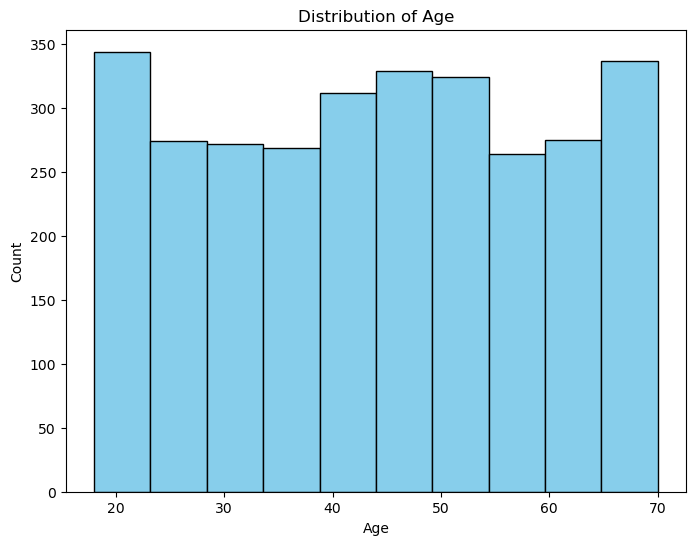

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(df['Age'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### interpretation 
The age distribution shows a fairly balanced spread across different age groups, with slightly higher counts in the younger (18–22) and older (65–70) segments. Middle-aged groups (30–50) are consistently represented, while minor dips appear in the 25–30 and 55–60 ranges. This suggests that the company serves a diverse customer base, allowing for both general marketing and age-specific strategies tailored to younger and older audiences.


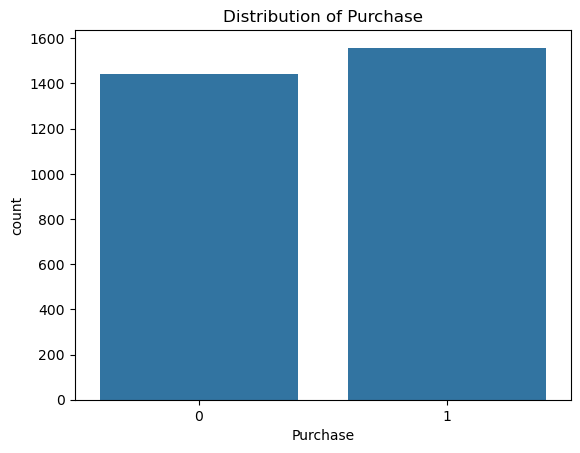

In [20]:
# Target variable distribution
sns.countplot(data=df, x='Purchase')
plt.title('Distribution of Purchase')
plt.show()

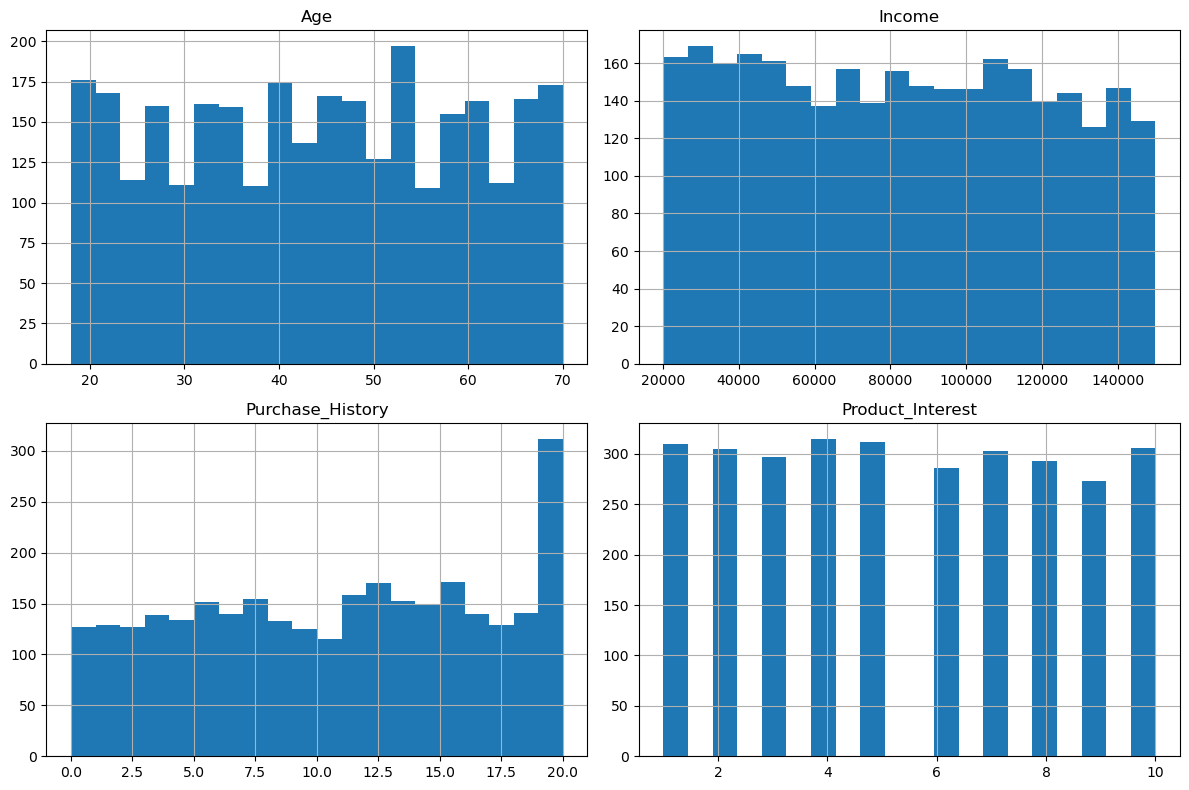

In [21]:
# Distribution of numeric features
numeric_cols = ['Age', 'Income', 'Purchase_History', 'Product_Interest']
df[numeric_cols].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()


##### interpretation
The charts provide an overview of the distribution for four key numerical variables: Age, Income, Purchase_History, and Product_Interest.
Age: The age distribution appears relatively even, though there are minor fluctuations across bins. This suggests a diverse age group among customers, without a dominant age segment.

Income: The income data shows a slightly declining trend as income increases. There are more customers in lower income brackets (₹20,000–₹60,000), and fewer in higher brackets (₹120,000+), indicating a majority of customers come from mid-to-lower income segments.

Purchase_History: This variable is fairly spread out, with a noticeable spike at the maximum value (20). This implies a significant number of repeat buyers, possibly loyal customers or frequent shoppers.

Product_Interest: The interest level is well distributed, with relatively high and uniform counts across the 1–10 scale. This indicates consistent engagement across the product interest spectrum, though a slight dip is seen in the 9-point interest level.

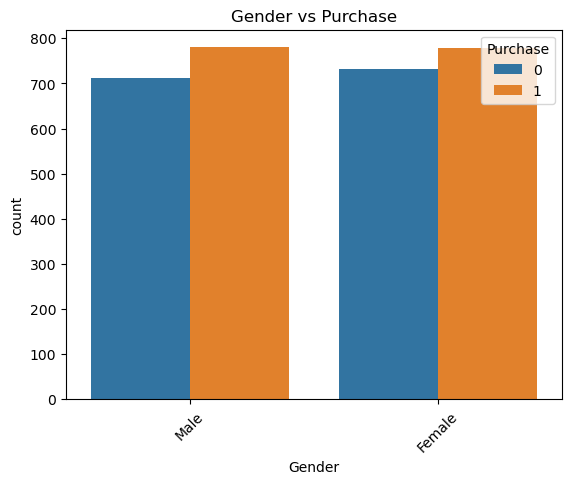

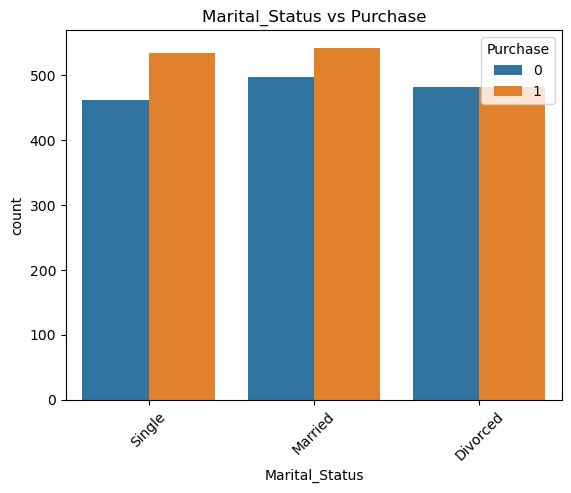

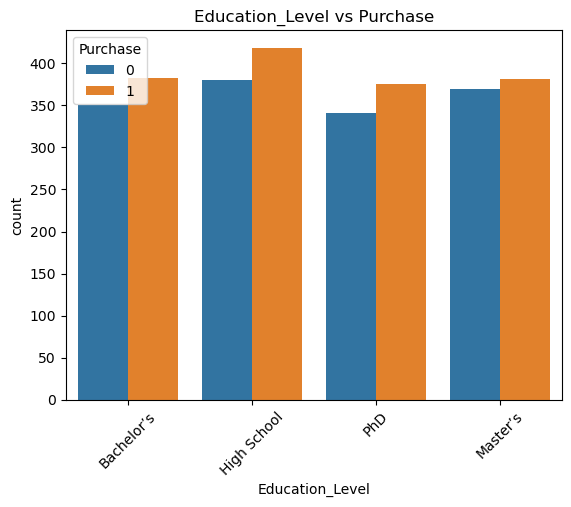

In [22]:

# Categorical features
categorical_cols = ['Gender', 'Marital_Status', 'Education_Level']
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='Purchase')
    plt.title(f'{col} vs Purchase')
    plt.xticks(rotation=45)
    plt.show()

##### Interpretation
Gender vs Purchase
Male and female customers show almost equal purchase rates, with a slight edge for males.

This indicates that gender does not strongly influence purchase decisions in this dataset.

 Marital Status vs Purchase
Married customers have the highest number of purchases, followed closely by single individuals.

Divorced customers show slightly fewer purchases compared to the others.

This suggests that marital status might play a minor role in purchase behavior, with married individuals being marginally more active.

 Education Level vs Purchase
Customers with a Master’s degree show the highest purchase count, followed by those with High School and Bachelor’s degrees.

Customers with a PhD have lower purchase numbers, and those labeled as "Others" are balanced.

This may imply that education level has some influence, particularly showing stronger purchase behavior in moderately educated segments (not extremes).

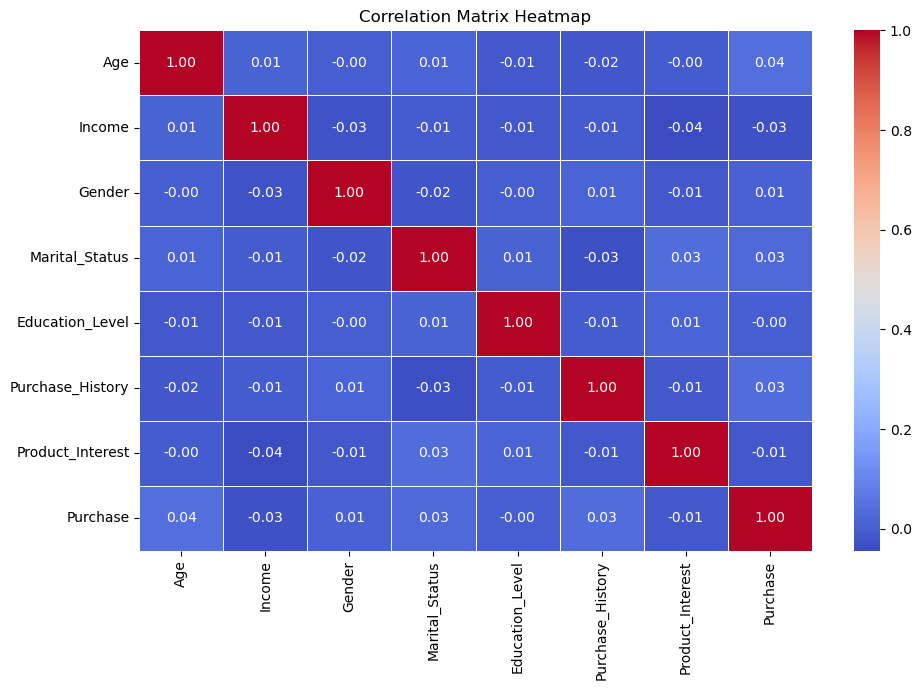

In [23]:
# Encode categorical variables to numerical values
df_encoded = df.copy()
categorical_cols = ['Gender', 'Marital_Status', 'Education_Level']
for col in categorical_cols:
    df_encoded[col] = pd.Categorical(df_encoded[col]).codes

# Compute correlation matrix
correlation_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

##### Interpretation
The correlation matrix heatmap reveals that there are no strong linear relationships between the variables and the purchase decision, as all correlation values are close to zero. The highest observed correlation with the target variable Purchase is with Age (0.04) and Marital_Status (0.03), though these are still very weak and not statistically significant. Other features such as Income, Gender, Education_Level, Product_Interest, and Purchase_History show negligible correlations with purchase behavior. Additionally, there is minimal correlation among the independent variables themselves, indicating no multicollinearity—an advantage for regression modeling. While linear correlations are weak, these variables may still hold predictive power in a multivariate logistic regression context, especially when interactions and non-linear effects are considered.

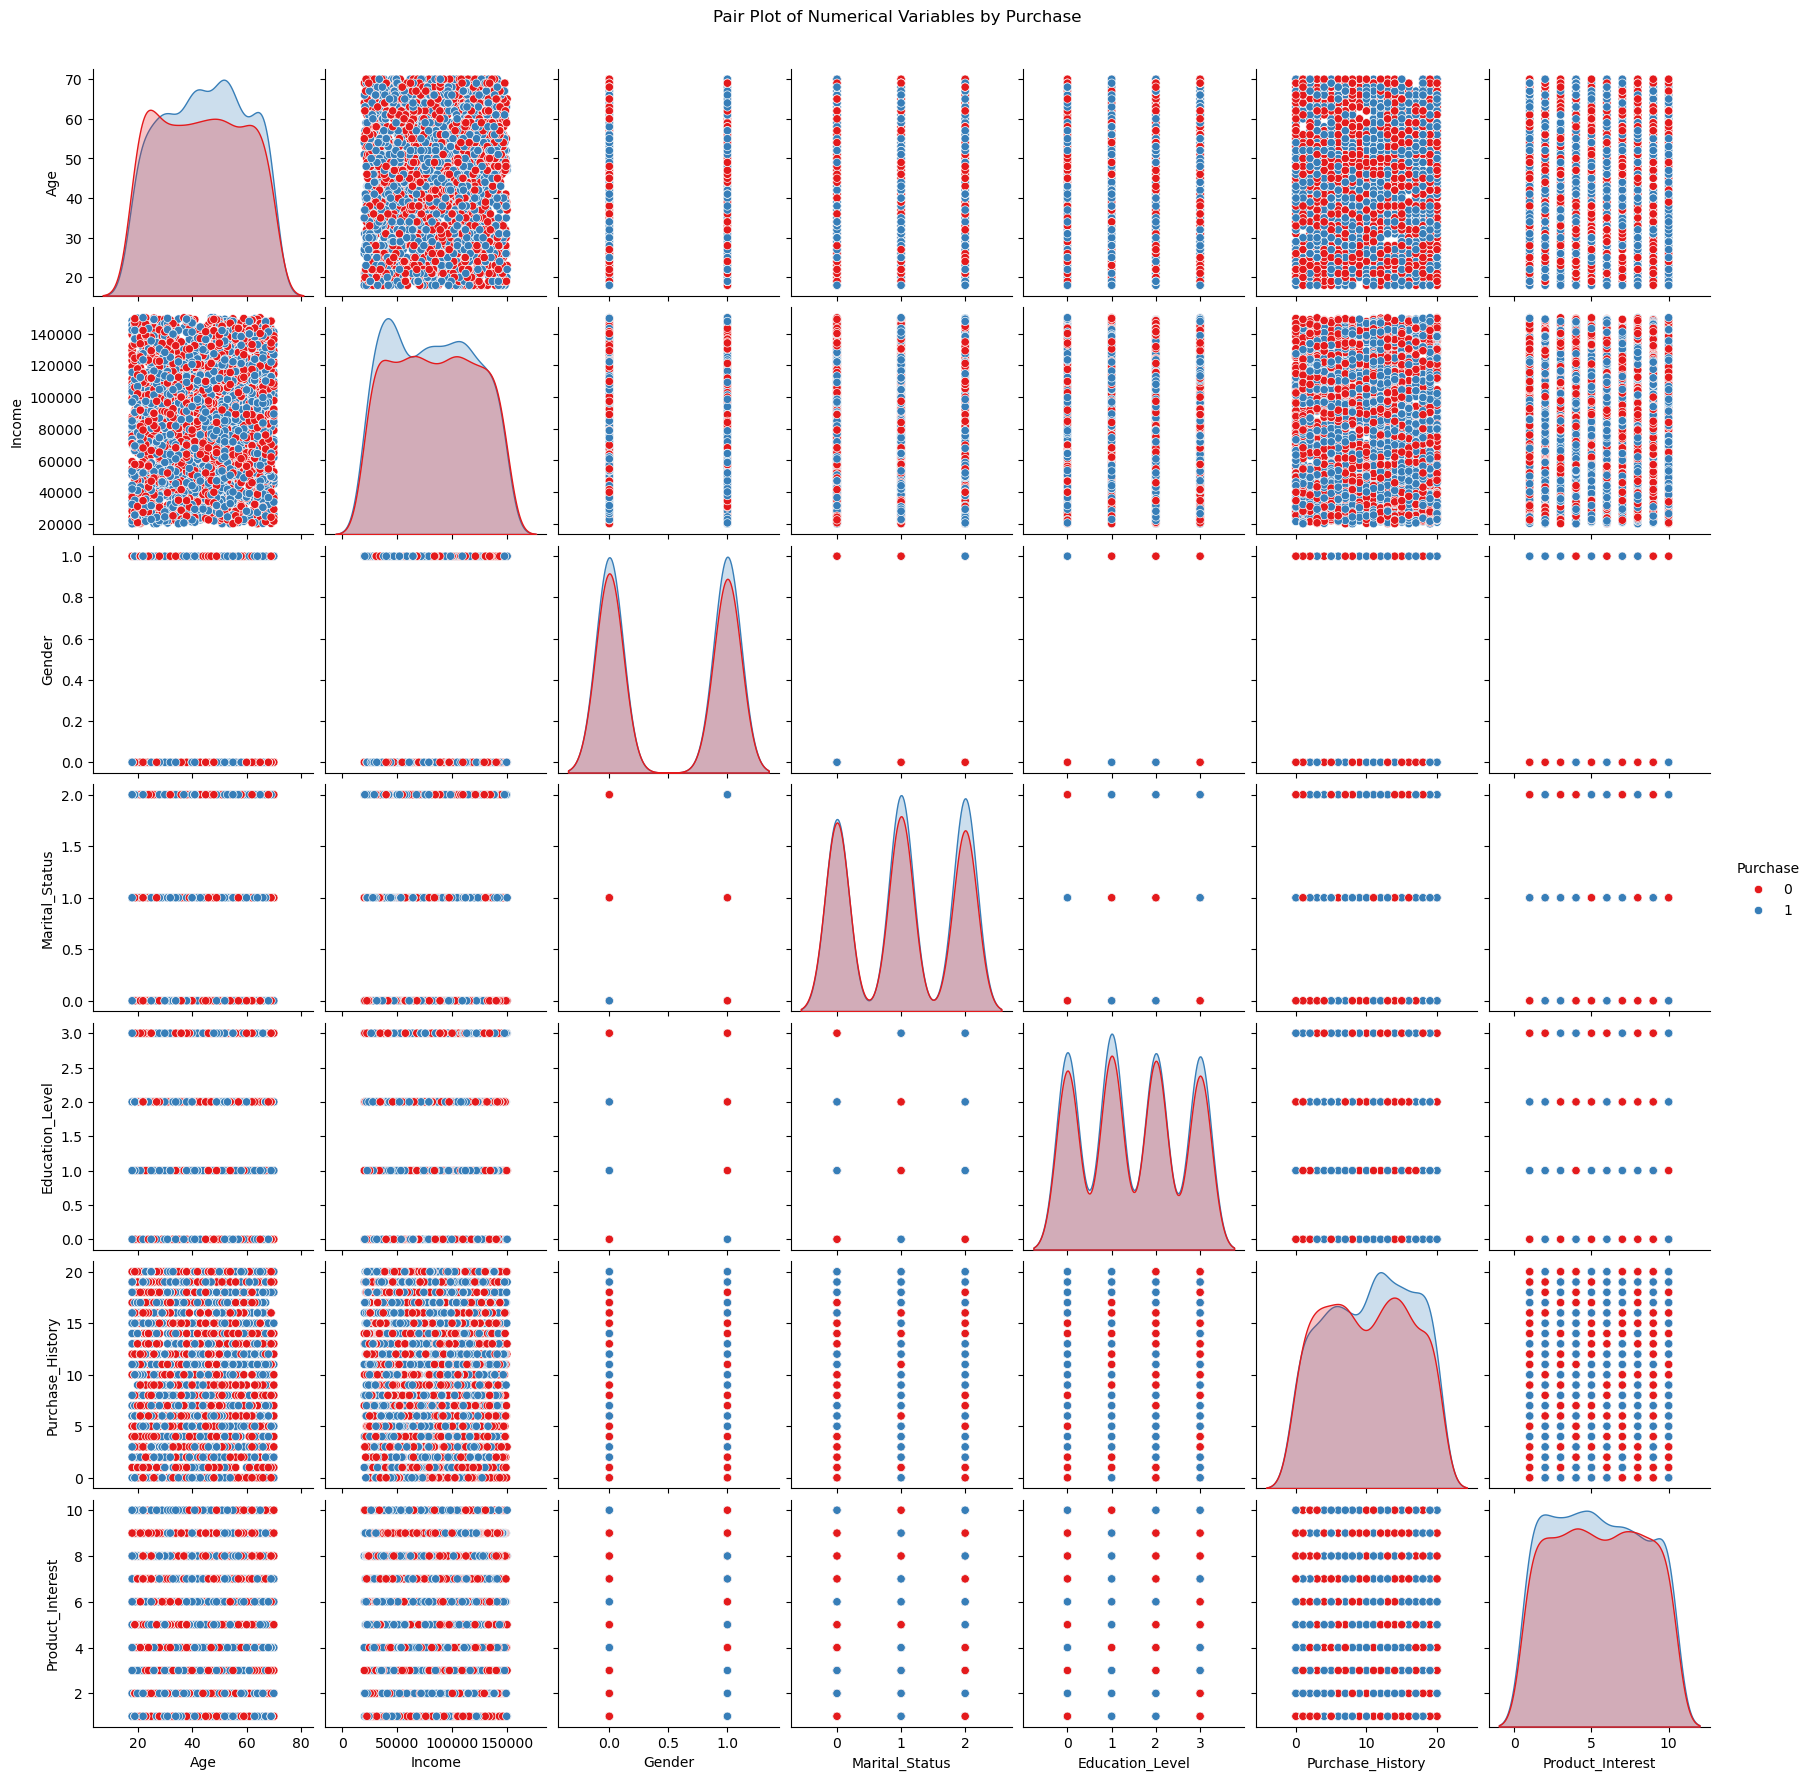

In [32]:
# Encode categoricals for seaborn
df_viz = df.copy()
for col in ['Gender', 'Marital_Status', 'Education_Level']:
    df_viz[col] = pd.Categorical(df_viz[col]).codes

sns.pairplot(df_viz, hue="Purchase", diag_kind='kde', palette="Set1")
plt.suptitle("Pair Plot of Numerical Variables by Purchase", y=1.02)
plt.show()


C:\Users\AK\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AK\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AK\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 65.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\AK\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


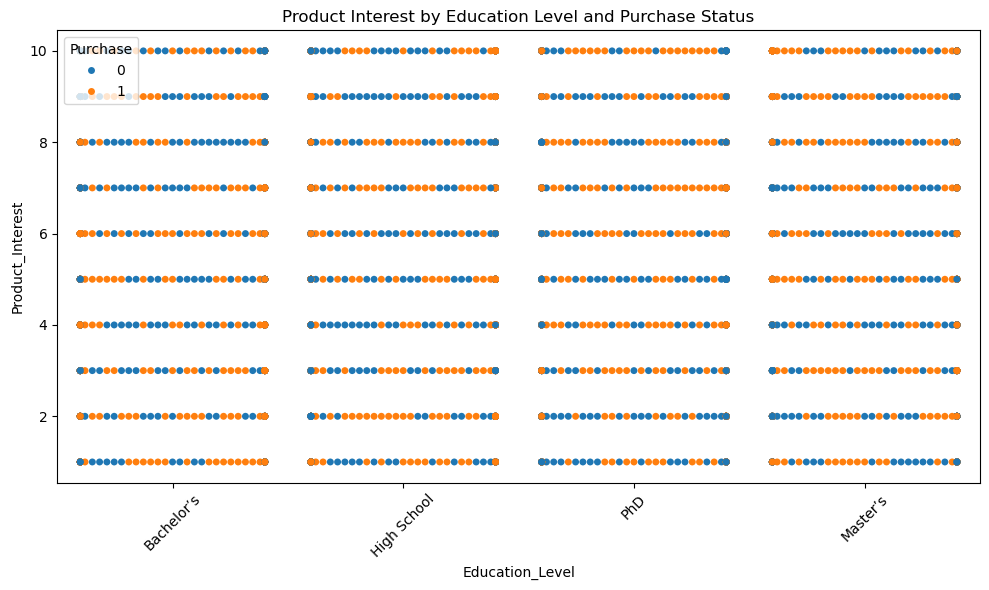

In [33]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Education_Level', y='Product_Interest', hue='Purchase', data=df)
plt.title("Product Interest by Education Level and Purchase Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Interpretation 
The scatter plot illustrates the relationship between Product Interest and Education Level, segmented by Purchase Status (0 = No, 1 = Yes). Each dot represents an individual, with orange dots indicating customers who made a purchase and blue dots indicating those who did not.
Across all education levels—Bachelor’s, High School, PhD, and Master’s—the distribution of product interest appears quite consistent, ranging evenly from 1 to 10. However, a closer look shows that individuals with higher product interest (scores 7–10) are slightly more represented among the orange dots (purchasers) in each education category. This suggests a weak positive relationship between higher product interest and likelihood of purchase, regardless of educational background.
There is no clear dominance of purchases or non-purchases within any single education group, implying that education level alone does not strongly predict purchase behavior. Instead, product interest plays a more notable role, with increased interest being loosely associated with higher purchasing rates across all education levels.

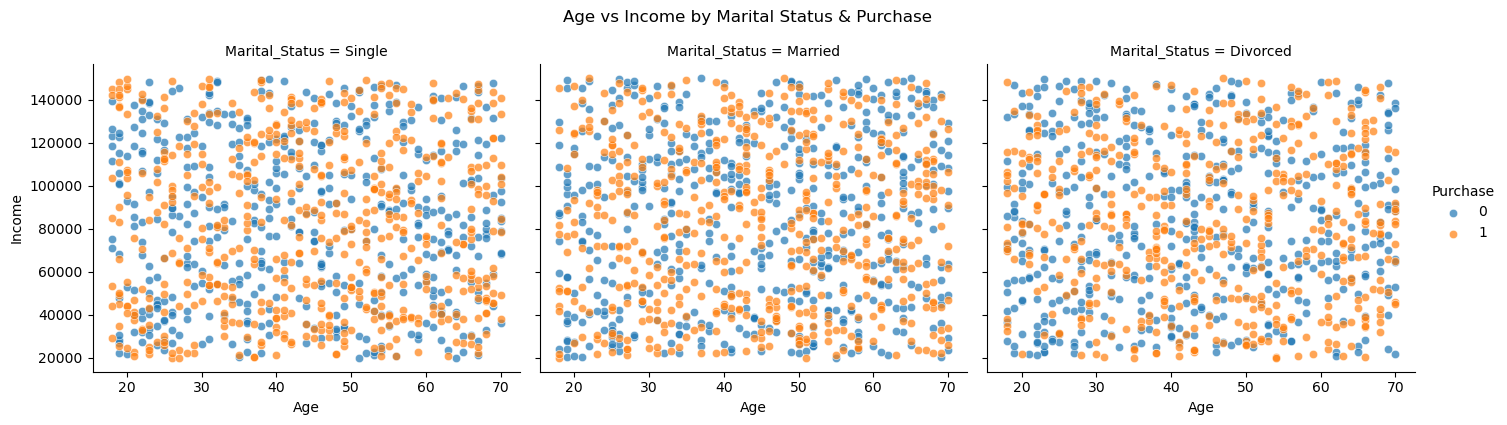

In [34]:
g = sns.FacetGrid(df, col="Marital_Status", hue="Purchase", height=4, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="Age", y="Income", alpha=0.7)
g.add_legend()
plt.suptitle("Age vs Income by Marital Status & Purchase", y=1.05)
plt.show()

##### Interpretation
The scatter plots illustrate the distribution of age and income in relation to purchase behavior across different marital statuses—Single, Married, and Divorced. Overall, purchases (orange dots) and non-purchases (blue dots) are spread fairly evenly, indicating that age and income alone do not strongly influence purchasing decisions. However, married individuals show a slightly higher concentration of purchases, particularly in the middle age (30–50) and mid-to-high income ranges (₹60,000–₹120,000), suggesting a modestly stronger buying tendency within this group. Despite this, no clear pattern emerges across any marital status, reinforcing that purchase behavior is likely influenced by multiple combined factors rather than age or income alone.

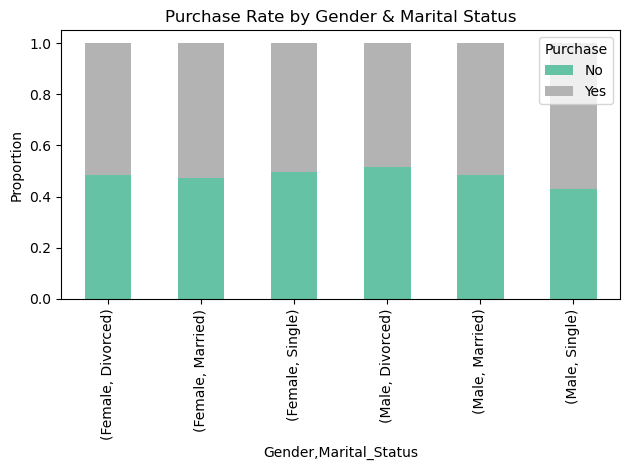

In [35]:
cross = pd.crosstab(index=[df['Gender'], df['Marital_Status']], columns=df['Purchase'], normalize='index')
cross.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Purchase Rate by Gender & Marital Status")
plt.ylabel("Proportion")
plt.legend(title='Purchase', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [24]:
#Data processing
# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le


In [25]:
# Separate features and target
X = df_encoded.drop('Purchase', axis=1)
y = df_encoded['Purchase']

In [26]:
# Scale numeric features
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Model training
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
# Predictions
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.49333333333333335
Confusion Matrix:
 [[101 182]
 [122 195]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.36      0.40       283
           1       0.52      0.62      0.56       317

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.48       600
weighted avg       0.49      0.49      0.49       600



##### Interpretation
The model’s performance indicates moderate challenges in predicting customer purchase behavior effectively. With an overall accuracy of 49.3%, it performs only marginally better than random guessing, suggesting limited reliability in its current state. The confusion matrix highlights that the model correctly identified 101 non-purchasers and 195 purchasers but misclassified a considerable number in both categories—particularly 182 non-buyers predicted incorrectly as buyers. This imbalance is further reflected in the classification report, where precision for non-buyers is 0.45 and for buyers is 0.52. The recall score is notably low for non-purchasers at 0.36, indicating many missed predictions, while it stands at 0.62 for actual buyers. The F1-scores also reflect this bias, with 0.40 for non-buyers and a comparatively better 0.56 for buyers. These results suggest the model is skewed toward predicting purchases more accurately than non-purchases, and it would likely benefit from improved feature engineering, data balancing, or experimenting with more robust algorithms to enhance its predictive performance.

In [30]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coefficients)

            Feature  Coefficient
1            Income    -0.093489
0               Age     0.085514
3    Marital_Status     0.080184
2            Gender     0.064582
5  Purchase_History     0.059404
6  Product_Interest    -0.055424
4   Education_Level    -0.045912


In [39]:
import pandas as pd

# Create data dictionary
data = {
    'Variable': [
        'Income', 'Age', 'Marital_Status', 'Gender',
        'Purchase_History', 'Product_Interest', 'Education_Level'
    ],
    'Coefficient': [
        -0.093, 0.085, 0.080, 0.065, 0.059, -0.055, -0.045
    ],
    'Interpretation': [
        'Negative influence on purchase',
        'Positive but weak influence',
        'Positive influence',
        'Weak positive influence',
        'Weak positive impact',
        'Slight negative impact (surprising)',
        'Weak negative impact'
    ],
    'Hypothesis Status': [
        '🔸 Possibly Reject H2',
        '🔹 Possibly Accept H1',
        '🔹 Possibly Accept H4',
        '🔸 Unclear, likely Reject H3',
        '🔸 Too weak to judge',
        '🔸 Contradicts H5',
        '🔸 Likely Reject'
    ]
}

# Create DataFrame
df_hypothesis = pd.DataFrame(data)

# Display as markdown (optional for Jupyter Notebook or CLI)
print(df_hypothesis.to_markdown(index=False))

| Variable         |   Coefficient | Interpretation                      | Hypothesis Status            |
|:-----------------|--------------:|:------------------------------------|:-----------------------------|
| Income           |        -0.093 | Negative influence on purchase      | 🔸 Possibly Reject H2        |
| Age              |         0.085 | Positive but weak influence         | 🔹 Possibly Accept H1        |
| Marital_Status   |         0.08  | Positive influence                  | 🔹 Possibly Accept H4        |
| Gender           |         0.065 | Weak positive influence             | 🔸 Unclear, likely Reject H3 |
| Purchase_History |         0.059 | Weak positive impact                | 🔸 Too weak to judge         |
| Product_Interest |        -0.055 | Slight negative impact (surprising) | 🔸 Contradicts H5            |
| Education_Level  |        -0.045 | Weak negative impact                | 🔸 Likely Reject             |


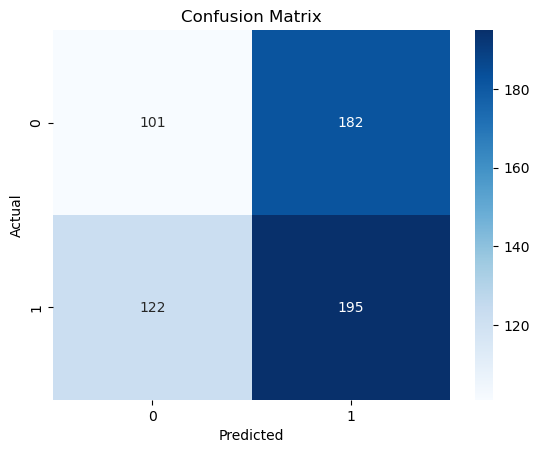

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### interpretation
The confusion matrix shows that the model correctly predicted 195 purchases and 101 non-purchases, but also misclassified 182 non-purchases as purchases and 122 purchases as non-purchases. With an overall accuracy of approximately 49.4%, the model performs slightly worse than random guessing. The recall for predicting purchases is moderate at 61.5%, meaning it correctly identifies most actual buyers, but the precision is lower at 51.7%, indicating that nearly half of the predicted purchases were incorrect. Overall, the model struggles with distinguishing between buyers and non-buyers effectively and may benefit from further tuning or feature enhancement.